# 2) En el paper de Barabasi, comparan dos mecanismos de generación de redes aleatorias no dirigidas para explicar las distribuciones tipo power law observadas en muchos tipos de redes muy diversos.
## a)
Arme un código para generar una red aleatoria tipo Erdos Renyi, con n cantidad de nodos
y aproximadamente m cantidad de enlaces. Este tipo de red consiste en simplemente tomar
n nodos y enlazar cada par con una probabilidad p.
### i. Arme una red de $n = 10000$ nodos y muestre que cumpla $m \cong  pn(n − 1)/2$
¿Por qué vale esta relación?


<ins>Aclaracion:</ins> Para optimizar los tiempos de ejecucion de las funciones voy a armar una que exclusivamente devuelva m (cantidad de enlaces) y otra que devuelva edges (vector de enlaces). La construccion es la misma pero sirven propositos distintos. Para el caso i. interesa unicamente el valor de m en funcion de valores de p. Y para el caso ii. interesa armar la red para un unico valor de p.

In [2]:
import networkx as nx
import random as random
import numpy as np
import matplotlib.pyplot as plt

#Inicialmente creo una funcion que devuelva m en funcion de n y p (p es un vector)
def ErdosRenyi_m(n,p_vect):
    m=0
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample < p:
                m+=1
    return(m)

#Creo una funcion que devuelve el listado de edges en funcion de n y p
def ErdosRenyi_edges(n,p):
    edges=[]
    #Itero sobre los pares i-j
    for i in range(n):
        for j in range(i+1,n):
            random_sample = random.random()
            if random_sample < p:
                edges.append((i,j))
    return(edges)

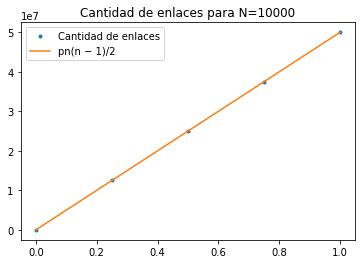

In [16]:
# Tarda aprox 40s en correr
n=10000 #cantidad de nodos
p_vect=np.linspace(0,1,5) # probabilidad de enlazar
m=[]
for p in p_vect:
    m.append(ErdosRenyi_m(n,p))
    
plt.plot(p_vect,m,'.',label = 'Cantidad de enlaces')
m_teorico=p_vect*n*(n - 1)/2
plt.plot(p_vect,m_teorico,label='pn(n − 1)/2')
plt.title(f'Cantidad de enlaces para N={n}')
plt.legend()
plt.show()

Es evidente del grafico que la relacion $m \cong  pn(n − 1)/2$ se cumple, esto se debe a que la cantidad de enlaces m, si la probabilidad fuera 1, seria el número de combinaciones sin repetición de 2 elementos elegidos entre los n. Usando la formula de combinatoria esto termina siendo $n(n-1)/2$. Si luego en cada iteracion agregamos que $p<1$, el valor mas probable termina siendo $pn(n-1)/2$.



### ii. Con la misma red, muestre que cumpla 〈ki〉 = p(n − 1). ¿Por qué vale esta relación?


Tomamos de ejemplo la red con $p=0.1$ y utilizamos la funcion ErdosRenyi_edges(n,p) armada anteriormente. Usamos un valor de p bajo para que la cantidad de enlaces agregar sea de un orden menor.

In [3]:
#Tarda aprox 8s
n=10000 #cantidad de nodos
p=0.1
edges=ErdosRenyi_edges(n,p)

In [4]:
#Tarda aprox 7s
#Genera la red con los nodos, sin conectar
Red_ErdosRenyi = nx.empty_graph(n) 
Red_ErdosRenyi.add_edges_from(edges)

In [40]:
#Calcula el grado medio
k_sum=0
for node in Red_ErdosRenyi.nodes():
    k_sum+=Red_ErdosRenyi.degree(node)
k_mean=k_sum/n

print(f"〈ki〉= {k_mean} \n p(n-1)= {p*(n - 1)}")

〈ki〉= 1000.086 
 p(n-1)= 999.9000000000001


Podemos ver que en la red del ejemplo la relacion se cumple. Esto se debe a que el grado medio se puede redefinir de la siguiente manera:
$$ \left \langle ki \right \rangle = \sum_{i}^{N} \frac{ki}{N} = \sum_{i,j}^{N} \frac{A_{ij}}{2N} = \frac{pn(n-1)/2}{2n} = p(n-1) $$
Donde $A_{ij}$ es la matriz de adyacencia, y el factor 2N se agrega debido a que al iterar sobre i y j, se recorre cada enlace dos veces (debido a que la matriz es simetrica).

In [ ]:
#Defino una funcion para generar una red de tipo erdos renyi en base a n y m
#Tarda aproximadamente 16 s para una red de n=10000 y p=0.1
def Red_ErdosRenyi(n,m):
    p=m/( n*(n-1)/2 )
    ErdosRenyi_edges(n,p)
    #Genera la red con los nodos, sin conectar
    Red = nx.empty_graph(n) 
    Red.add_edges_from(edges)
    return(Red)

## b) Arme un código para generar una red aleatoria, con n cantidad de nodos y un grado inicial k0 fijo e igual para cada nodo.
Este tipo de red consiste en comenzar con k0 nodos de grado k0 e ir agregando un nodo de grado k0 en cada paso. Los nodos ya agregados irán aumentando su grado al conectarse con los nodos nuevos que se vayan agregando. La manera de conectar un nodo nuevo a los existentes es aleatoria, donde el enlace entre el nuevo nodo y uno existente ocurre con igual propabilidad para todos los nodos existentes. Es decir, la probabilidad de que el nodo nuevo se enlace a uno existente (i) es: P = 1/N. Donde N son todos los nodos existentes en ese paso.

In [99]:
def Aleatoria_n_k0(n,k0):
    #Comienza con k0 nodos de grado k0
    Red = nx.complete_graph(k0)
    for paso in range(k0,n):
        nodos_a_enlazar=random.sample(Red.nodes(), k0)
        enlaces_nuevos=[]
        for nodo in nodos_a_enlazar:
            enlaces_nuevos.append((nodo,paso))
        Red.add_edges_from(enlaces_nuevos)
    return(Red)

In [101]:
k0=10
n=10000
Red_aleatoria=Aleatoria(n,k0)

45


Para este tipo de red, la cantidad de enlaces corresponde a la suma de los enlaces de la red completa inicial mas la suma de los k0 enlaces agregados uno por uno: 
$$ m= k_0(k_0-1)/2 + (n-k_0)k_0 $$

De esta manera de obtiene la siguiente formula para la relacion entre $k_0$ n y m:
$$0 =- \frac{1}{2} k_0^{2} + \left (  n-\frac{1}{2}\right ) k_0 - m$$

Con lo cual los $k_0$ que generan una red de n nodos y ~m enlaces son el entero positivo mas cercano a las raices reales y positivas de esa ecuacion. 

In [102]:
#Por ejemplo tomamos n=100, m=1000
n=1000
m=89000
c=[-0.5 , n-0.5 , -m]
k0=[round(x) for x in np.roots(c) if np.isreal(x) and x > 0][0]
m_obtenido=k0*(k0-1)/2 + (n-k0)*k0
print(f"Para n={n}, m={m}, el k0 obtenido con este metodo es {k0} y genera {m_obtenido} enlaces.")

Para n=1000, m=89000, el k0 obtenido con este metodo es 1906.0 y genera 88629.0 enlaces.


In [103]:
def Red_aleatoria(n,m):
    c=[-0.5 , n-0.5 , -m]
    k0=[round(x) for x in np.roots(c) if np.isreal(x) and x > 0][0]
    #En caso que devuelva k0=0, lo redefino como 1
    if k0==0: k0=1
    Red=Aleatoria_n_k0(n,k0)
    return(Red)  

## c) Arme un código para generar una red aleatoria tipo Barabasi, con n cantidad de nodos y un grado inicial k0 fijo e igual para cada nodo. 
Este tipo de red consiste en comenzar con pocos nodos de grado k0 e ir agregando un nodo de grado k en cada paso. Los nodos ya
agregados irán aumentando su grado al conectarse con los nodos nuevos que se vayan agregando. La manera de conectar un nodo nuevo a los existentes es aleatoria, determinada por una probabilidad proporcional al grado de cada nodo existente. Es decir, la probabilidad de que el nodo nuevo se enlace a uno existente (i) es: P = ki/ ∑j kj

. Donde la sumatoria es sobre todos los nodos existentes.
### i. Arme una red de n = 10000 nodos y muestre que cumpla m ≅ k0n. ¿Por qué vale esta relación?
Ayuda: puede comparar las redes de sus códigos con la de la librería networkx que cumple
la misma función: barabasi_albert_graph(n, k0).
Ayuda: para agregar los enlaces con una probabilidad dada por el grado de cada nodo,
una estrategia podría ser armar una lista de los nodos, donde cada nodo aparezca tantas
veces como su grado.

## d) Calcule y grafique la distribución de grado para los 3 tipos de redes, para 4 casos donde m y n sean similares a aquellos de las redes del ejercicio 1). 
¿Qué tipo de red da una distribución más parecida a las de los datos? ¿Es posible extraer una conclusión general
sobre el mecanismo de generación de estas redes?